Data analytics lab. 2 Tomasz Brania 16.03.2023

Intro to stan

In [55]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [56]:
#F - number of letters in first name L - number of letters in last name
F = 6
L = 6

Excercise 1 - Generated Quantities Block

In [57]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [58]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [59]:
#Create a pandas dataframe from resulting draws
df = samples.draws_pd()

In [60]:
df.head()

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,182.58400,155.0,149.0,195.0,191.0,181.0,176.0
1,0.0,0.0,6.55167,11.0,4.0,6.0,6.0,7.0,10.0
2,0.0,0.0,84.84620,85.0,78.0,79.0,94.0,77.0,90.0
3,0.0,0.0,15.49060,18.0,12.0,16.0,18.0,12.0,15.0
4,0.0,0.0,11.37010,18.0,7.0,13.0,11.0,11.0,12.0


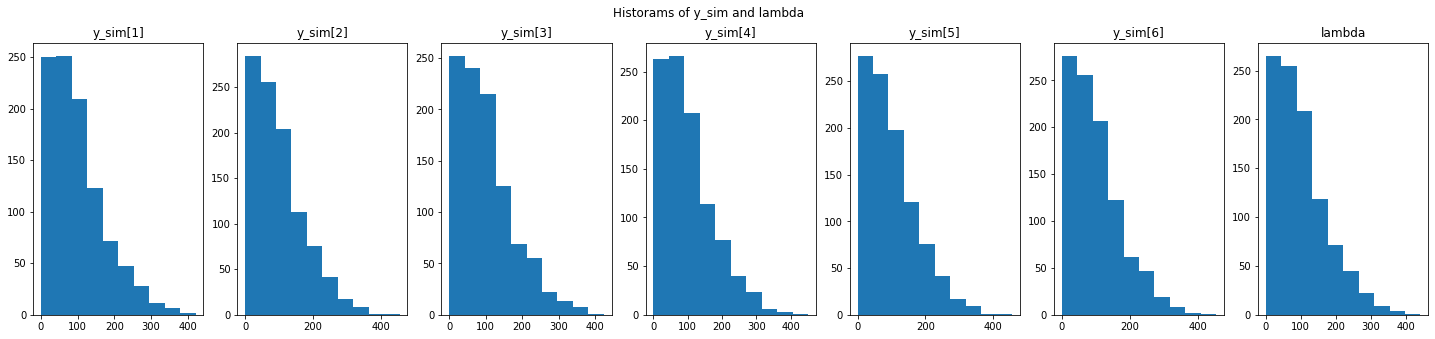

In [61]:
#Plot a histogram for each of y_sim and lambda
plt.figure(figsize=(25,5))
plt.suptitle('Historams of y_sim and lambda')
plt.subplot(171)
plt.title('y_sim[1]')
plt.hist(x=df['y_sim[1]'])
plt.subplot(172)
plt.title('y_sim[2]')
plt.hist(x=df['y_sim[2]'])
plt.subplot(173)
plt.title('y_sim[3]')
plt.hist(x=df['y_sim[3]'])
plt.subplot(174)
plt.title('y_sim[4]')
plt.hist(x=df['y_sim[4]'])
plt.subplot(175)
plt.title('y_sim[5]')
plt.hist(x=df['y_sim[5]'])
plt.subplot(176)
plt.title('y_sim[6]')
plt.hist(x=df['y_sim[6]'])
plt.subplot(177)
plt.title('lambda')
plt.hist(x=df['lambda'])

plt.show()

Excercise 2 - Constraints on the data

In [62]:
#Observe how constraints on data behave for code_2 and code_3
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[1,1]})

# 'y' = [0,2] causes error with reaching size limit
# 'y' = [1,1] or [0,1] don't return error

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [63]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[1,1]})

# the same situation like in a previous task

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |██████████| 00:00 Sampling completed                     
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Excercise 3 - Constraints on parameters

Unconstrained parameters

In [64]:
#Constraints in parameters behave more subtely. We are infering theta without data from its prior.
#Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.

model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█▌        | 00:00 Iteration:  900 / 7000 [ 12%]  (Warmup)








chain 1 |██▎       | 00:04 Iteration: 1400 / 7000 [ 20%]  (Sampling)


chain 1 |██▉       | 00:06 Iteration: 1800 / 7000 [ 25%]  (Sampling)



chain 1 |███▏      | 00:06 Iteration: 2000 / 7000 [ 28%]  (Sampling)



chain 1 |███▍      | 00:07 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:07 Iteration: 2300 / 7000 [ 32%]  (Sampling)


chain 1 |███▊      | 00:08 Iteration: 2400 / 7000 [ 34%]  (Sampling)

chain 1 |███▉      | 00:08 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████      | 00:09 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▏     | 00:09 Iteration: 2700 / 7000 [ 38%]  (Sampling)


chain 1 |████▎     | 00:10 Iteration: 2800 / 7000 [ 40%]  (Sampling)


chain 1 |████▍     | 00:10 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |████


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/volume_for_DA/samples/code_4-20230322155022_1.csv, /home/volume_for_DA/samples/code_4-20230322155022_2.csv, /home/volume_for_DA/samples/code_4-20230322155022_3.csv, /home/volume_for_DA/samples/code_4-20230322155022_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

In [65]:
print(out_gamma1.diagnose())

Processing csv files: /home/volume_for_DA/samples/code_4-20230322155022_1.csv, /home/volume_for_DA/samples/code_4-20230322155022_2.csv, /home/volume_for_DA/samples/code_4-20230322155022_3.csv, /home/volume_for_DA/samples/code_4-20230322155022_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
9489 of 24000 (39.54%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



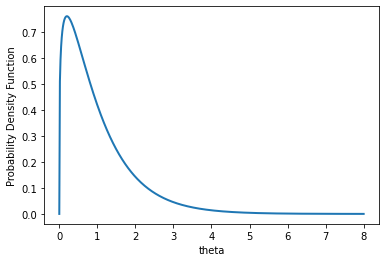

In [66]:
# 9489 of 24000 (39.54%) transitions ended with a divergence

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

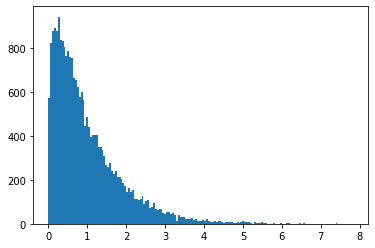

In [67]:
## add histogram of theta samples with 160 bins
df = out_gamma1.draws_pd()
plt.hist(x=df['theta'], bins=160)
plt.show()

Constrained parameter

In [68]:
#Verify what changes if constraints are added as in code_5

model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |██        | 00:01 Iteration: 1200 / 7000 [ 17%]  (Sampling)

chain 1 |██▏       | 00:02 Iteration: 1300 / 7000 [ 18%]  (Sampling)

chain 1 |██▎       | 00:04 Iteration: 1400 / 7000 [ 20%]  (Sampling)


chain 1 |██▌       | 00:04 Iteration: 1500 / 7000 [ 21%]  (Sampling)

chain 1 |██▋       | 00:04 Iteration: 1600 / 7000 [ 22%]  (Sampling)

chain 1 |██▊       | 00:05 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |██▉       | 00:05 Iteration: 1800 / 7000 [ 25%]  (Sampling)

chain 1 |███       | 00:05 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▏      | 00:06 Iteration: 2000 / 7000 [ 28%]  (Sampling)

chain 1 |███▎      | 00:06 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |███▍      | 00:07 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:07 Iteration: 2300 / 7000 [ 32%] 


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/volume_for_DA/samples/code_5-20230322155103_1.csv, /home/volume_for_DA/samples/code_5-20230322155103_2.csv, /home/volume_for_DA/samples/code_5-20230322155103_3.csv, /home/volume_for_DA/samples/code_5-20230322155103_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

In [69]:
print(out_gamma2.diagnose())

Processing csv files: /home/volume_for_DA/samples/code_5-20230322155103_1.csv, /home/volume_for_DA/samples/code_5-20230322155103_2.csv, /home/volume_for_DA/samples/code_5-20230322155103_3.csv, /home/volume_for_DA/samples/code_5-20230322155103_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
2 of 24000 (0.01%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



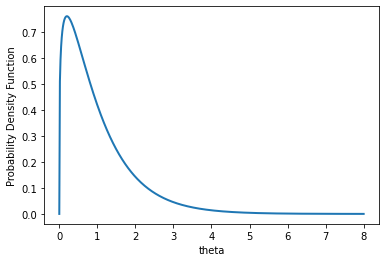

In [70]:
# 2 of 24000 (0.01%) transitions ended with a divergence

N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

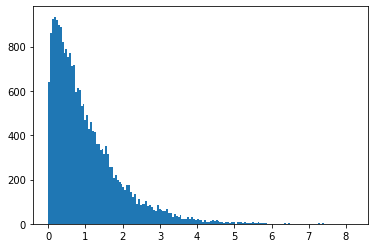

In [71]:
## add histogram of theta samples from the second model with 160 bins
df = out_gamma2.draws_pd()
plt.hist(x=df['theta'], bins=160)
plt.show()

Excercise 4 - Selection of parameters using equation solving

In [72]:
# Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2
model_tune = CmdStanModel(stan_file='code_6.stan')

F = F# number of letters in the first name
L = L# number of letters in the last name
y0 = 2# initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

tunes.draws_pd()
# Wanted standard deviation = 2.32935

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


Excercise 5 - different methods of defining models

In [73]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 12022000#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status








chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


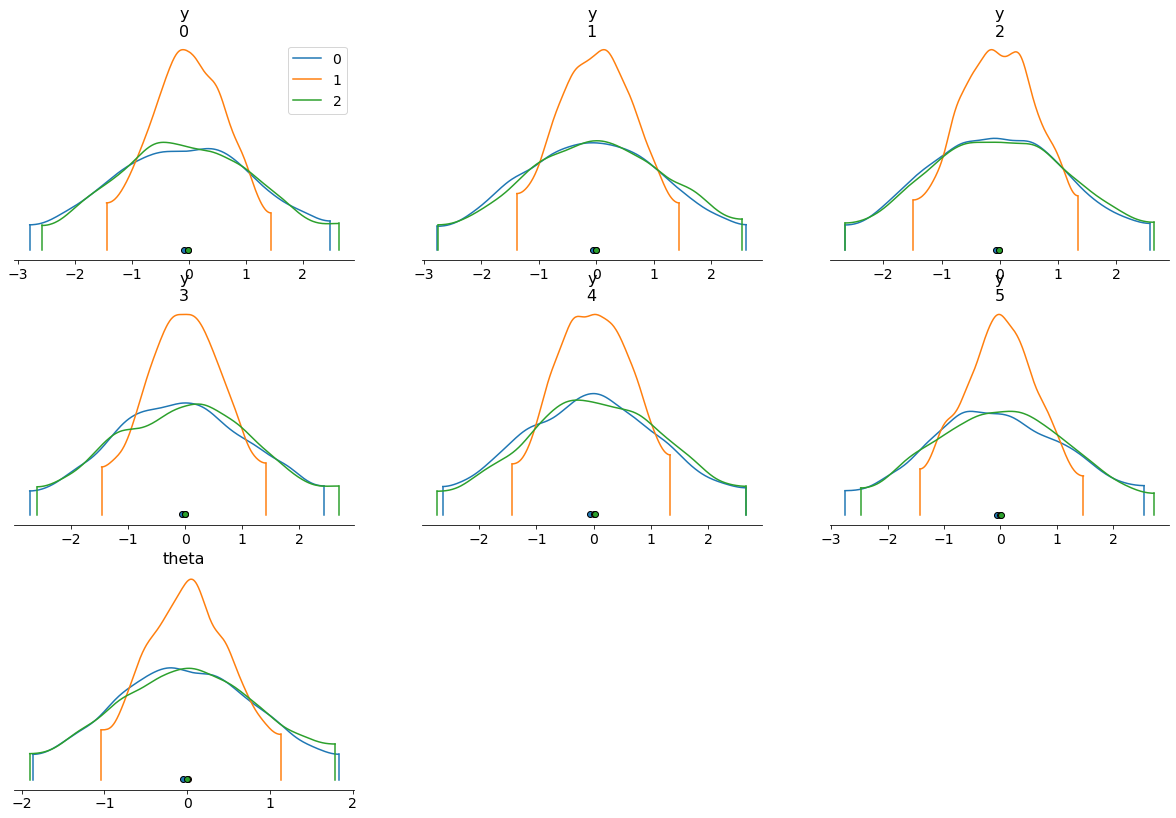

In [74]:
az.plot_density([result_1,result_2,result_3])
plt.show()

Excercise 6 - generated quantities post sampling

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


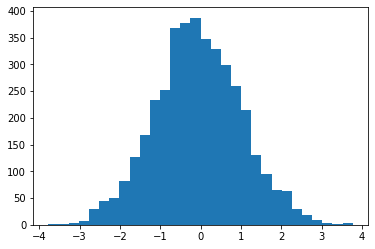

In [75]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
plt.hist(mean_of_y.draws_pd(), bins=30)
plt.show()

Conclusions:

This was the first time I worked with code written in stan. In exercise 2 we can see that not appropriate constraints may cause exceeding the size limit. Exercise 3 shows that making constraints parameters may be very useful. As diagnoses indicated, for unconstrainted parameters 9489 of 24000 (39.54%) transitions ended with a divergence whereas only 2 of 24000 (0.01%) transitions ended with a divergence when constraints were added.
Stan outside of sampling allows for certain computational tools. In particular equation solving and distributuion generating.